In [16]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [17]:
newdata = pd.read_csv('rymldata01v(1).csv')
newdata.head(5)

,Unnamed: 0,WHIDX,SKUIDX,SALE_DATE,TOTAL_QTY
0,0,69100,3269615,2019-01-01,1
1,1,69100,3269615,2019-01-06,1
2,2,69100,3269615,2019-01-10,1
3,3,69100,3269615,2019-01-11,1
4,4,69100,3269615,2019-01-18,1


In [18]:
newdata.columns = newdata.columns.str.lower()
newdata.columns

Index(['unnamed: 0', 'whidx', 'skuidx', 'sale_date', 'total_qty'], dtype='object')

In [19]:
data_3589974 = newdata.loc[(newdata['whidx'] == 28902) & (newdata['skuidx'] == 3589974)]
data_3589974 = data_3589974.sort_values('sale_date',ascending = False)

In [20]:
## test for stationarity : 
import statsmodels
from statsmodels.tsa.stattools import adfuller
adfuller(data_3589974['total_qty'])
adfuller(data_3589974['total_qty'])[1] < 0.05


True

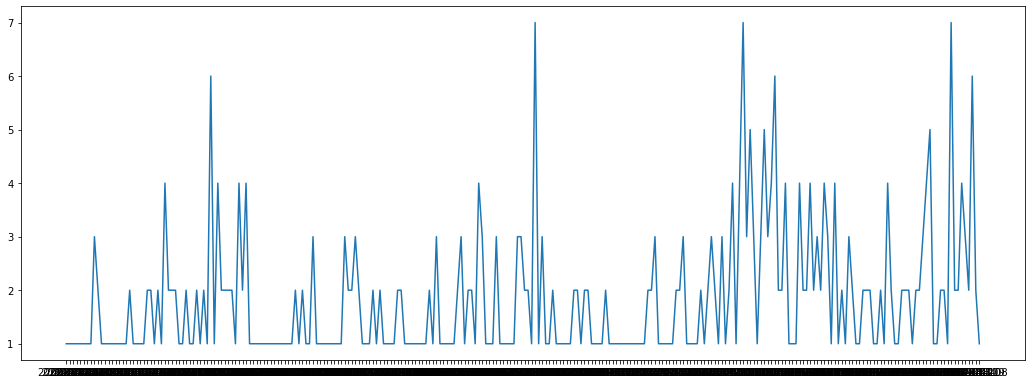

In [21]:
plt.rcParams["figure.figsize"] = (18,6.5)
plt.plot('sale_date','total_qty',data = data_3589974)

In [48]:
!pip install scipy==1.9.0


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
!python.exe -m pip install --upgrade pip

     ---------------------------------------- 2.0/2.0 MB 7.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.1.2
    Uninstalling pip-22.1.2:
      Successfully uninstalled pip-22.1.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Indranil\\AppData\\Local\\Temp\\pip-uninstall-4wzfj_fm\\pip.exe'
Consider using the `--user` option or check the permissions.



In [52]:
!pip install statsmodels==0.13.2

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Indranil\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\~-atsmodels\\tsa\\statespace\\_cfa_simulation_smoother.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Using cached statsmodels-0.13.2-cp39-cp39-win_amd64.whl (9.1 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.0
    Uninstalling statsmodels-0.13.0:
      Successfully uninstalled statsmodels-0.13.0

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


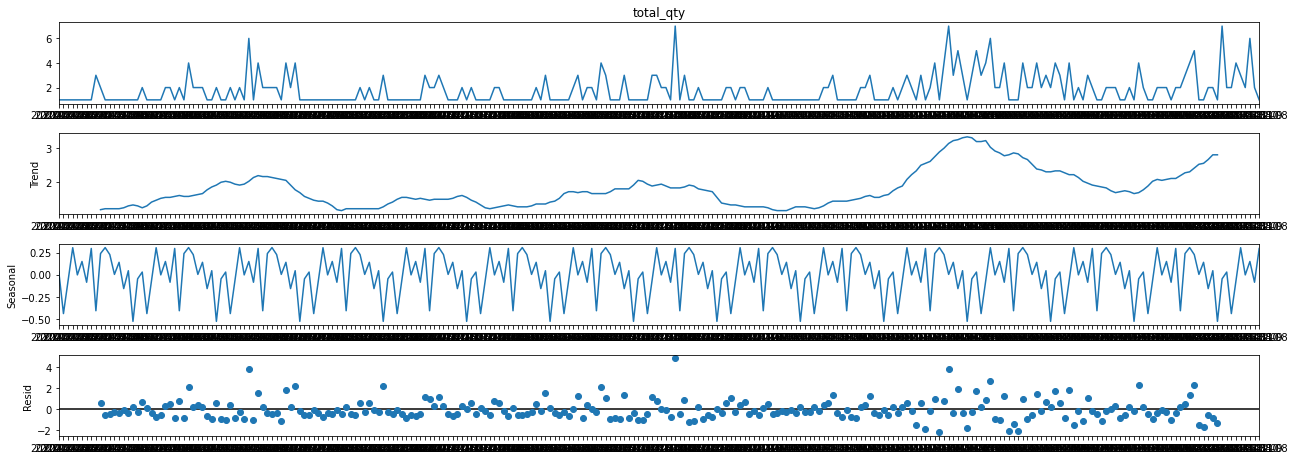

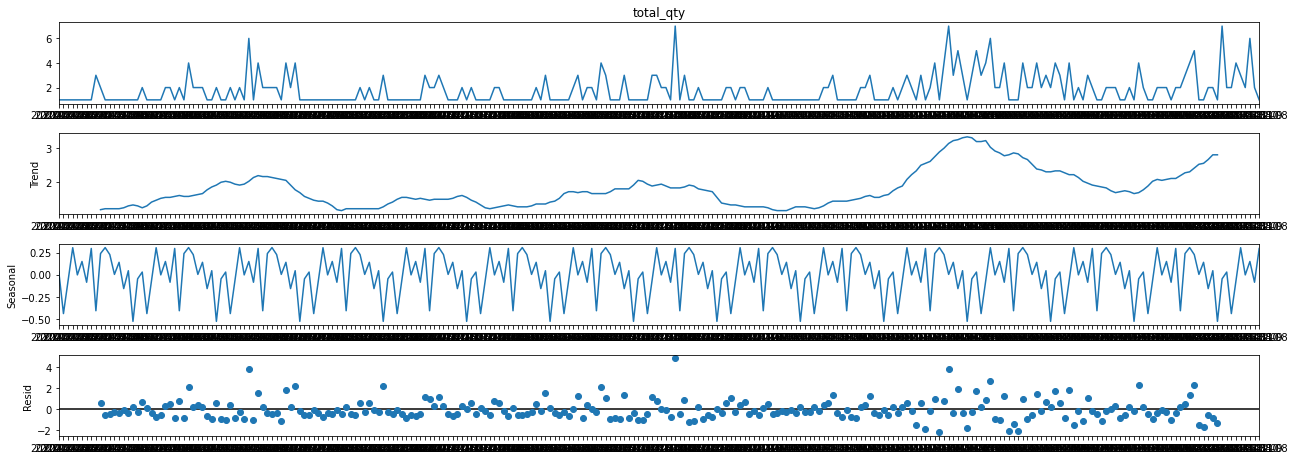

In [24]:
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
data_3589974.set_index(data_3589974.sale_date,inplace=True)  
result = seasonal_decompose(data_3589974['total_qty'],model = 'additive',period = 18)
result.plot()

<AxesSubplot:xlabel='sale_date'>

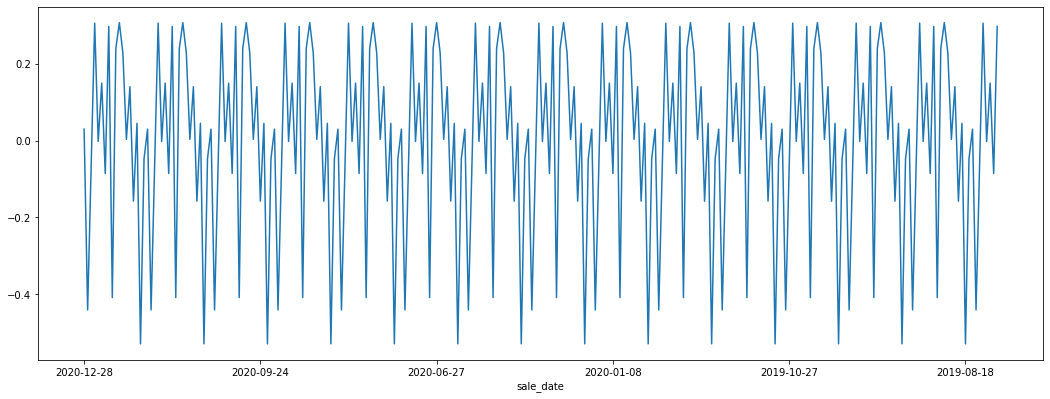

In [25]:
result.seasonal.plot()

# Analysis of Seasonal Component:

In [26]:
seasonal_dt = result.seasonal

In [27]:
## test for stationarity : 
import statsmodels
from statsmodels.tsa.stattools import adfuller
adfuller(seasonal_dt)
adfuller(seasonal_dt)[1] < 0.05

True

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


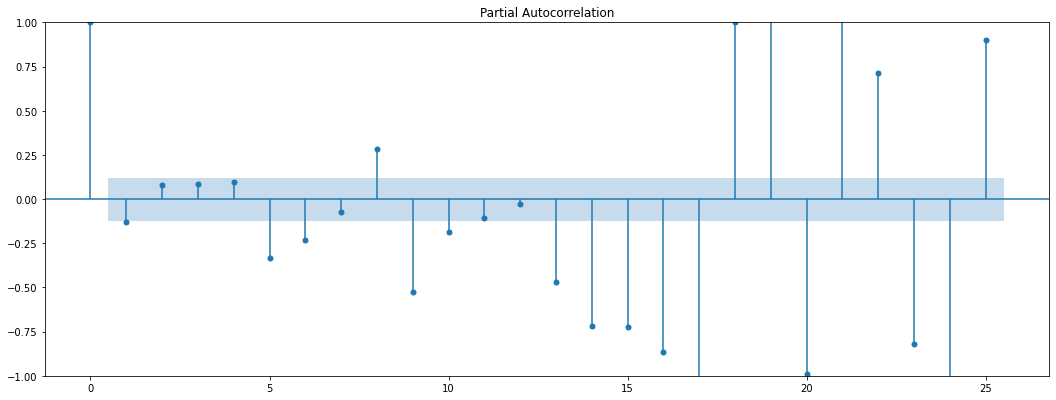

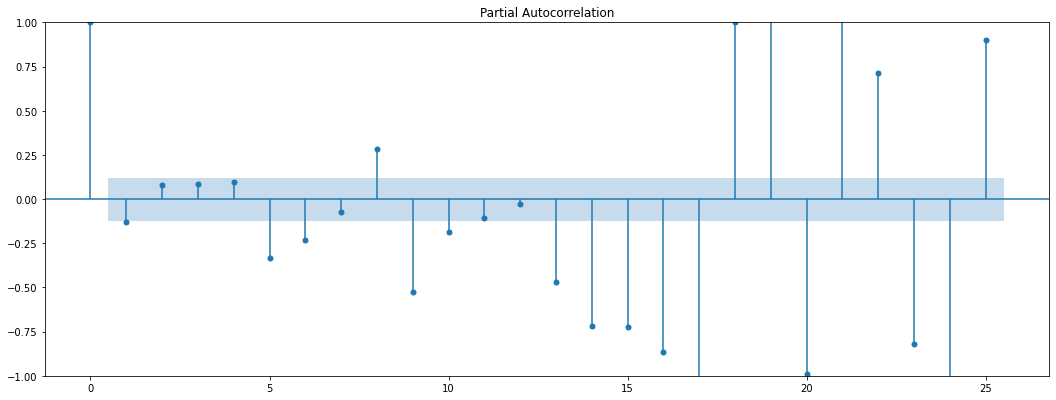

In [28]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(seasonal_dt)

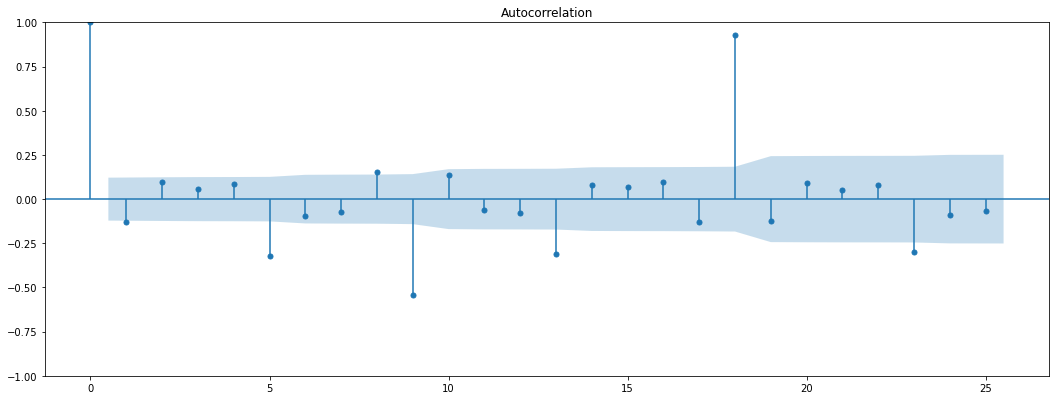

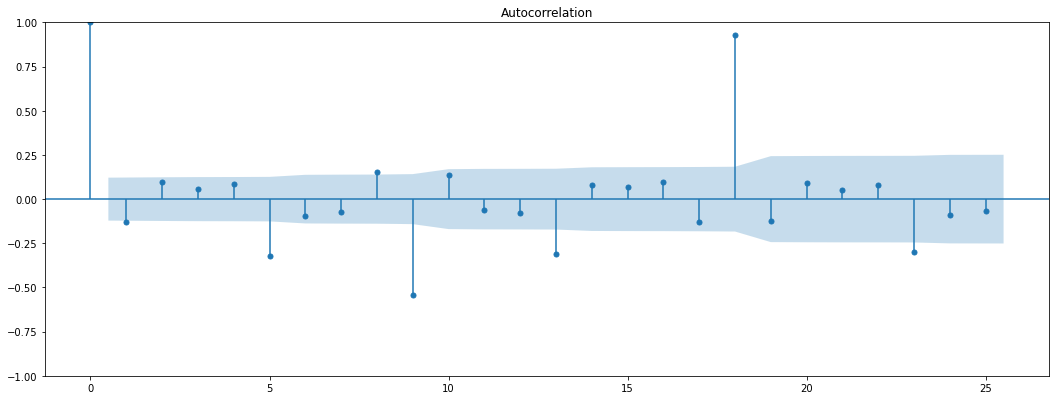

In [29]:
plot_acf(seasonal_dt)

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


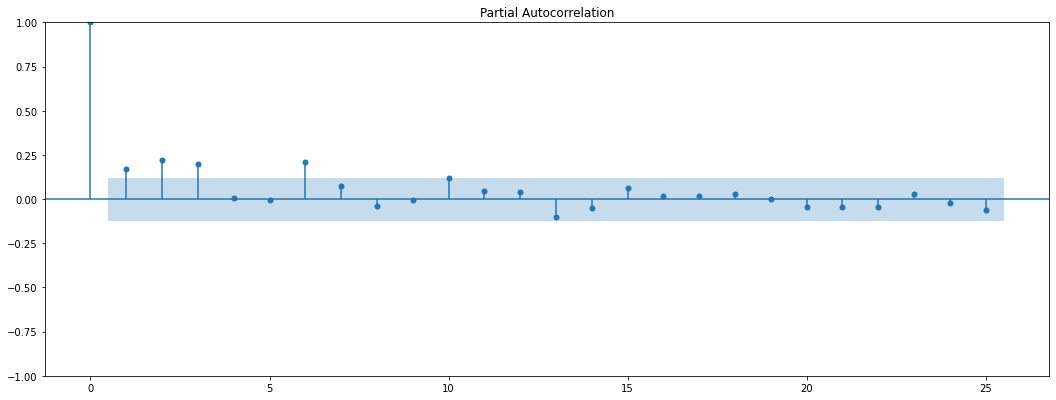

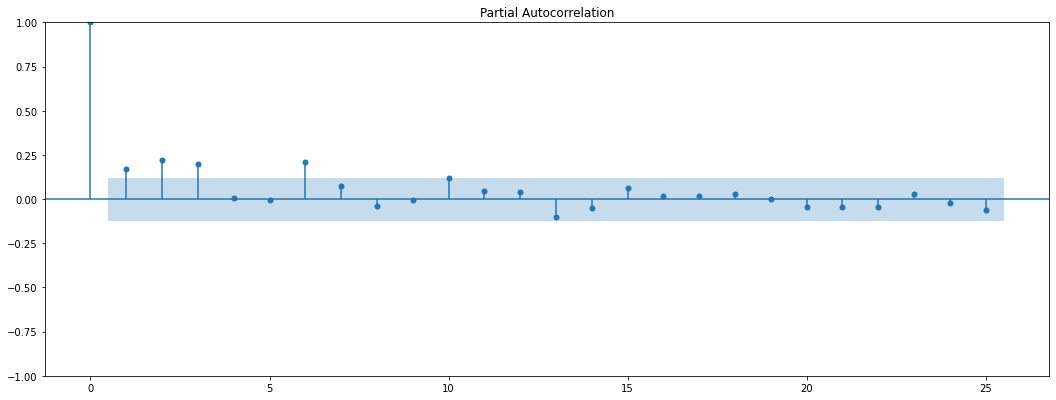

In [30]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(data_3589974.total_qty)

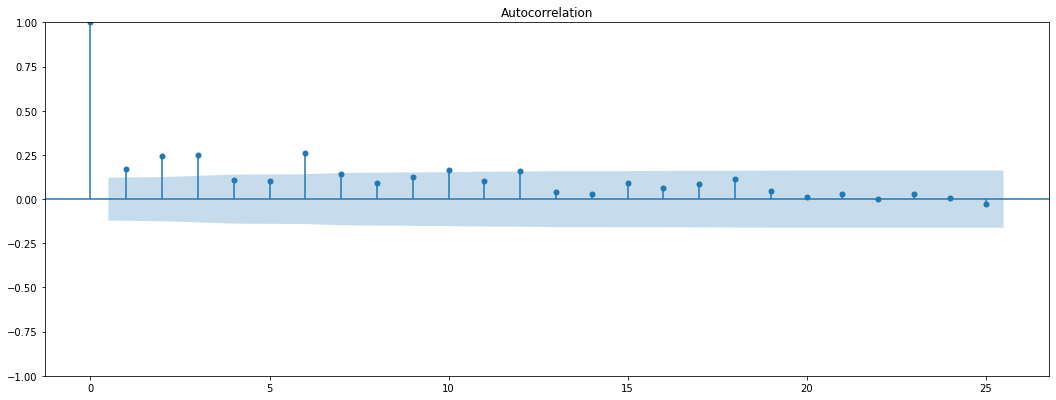

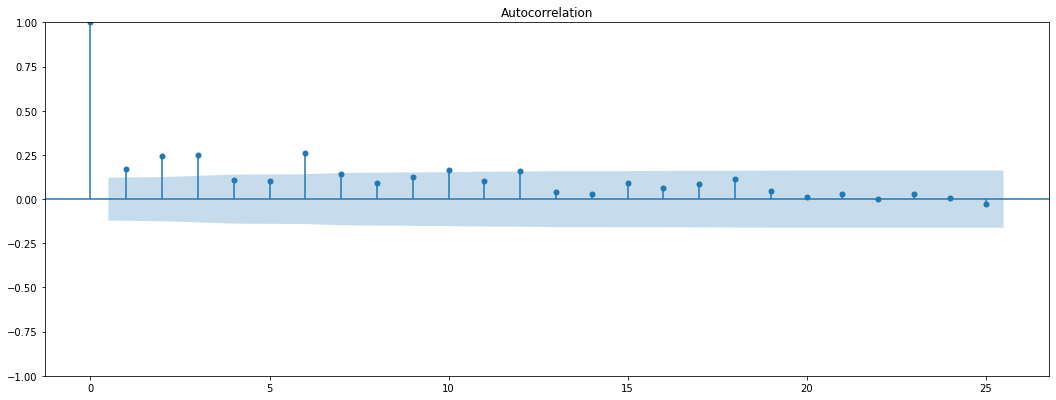

In [31]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_3589974.total_qty)

In [32]:
print(f'duration : start :{data_3589974.sale_date.min()} & end : {data_3589974.sale_date.max()}')
train = data_3589974.loc[data_3589974['sale_date'] <= '2020-06-30 00:00:00']
test = data_3589974.loc[data_3589974['sale_date'] > '2020-06-30 00:00:00']
test.shape[0]

duration : start :2019-08-08 & end : 2020-12-28


98

In [42]:
p_list = list(range(1,6))
q_list = list(range(1,9))

search_orders = ((1,0,1),)
for x in p_list:
    for y in q_list:
        search_orders = search_orders + ((x,0,y),)

In [103]:
import pandas as pd
import skforecast
import matplotlib.pyplot as plt
from skforecast.model_selection_statsmodels import grid_search_sarimax

import warnings
warnings.filterwarnings('ignore')

param_grid = {'order': list(search_orders),
             'seasonal_order': [(1, 0, 1, 12)],
             'trend': [None, 'n', 'c']}

results_grid = grid_search_sarimax(
                y = data_3589974['total_qty'],
                param_grid = param_grid,
                initial_train_size = len(train),
                steps = test.shape[0],
                metric = 'mean_absolute_error',
                refit = False,
                verbose = False,
                fit_kwargs = {'maxiter': 200, 'disp': 0})

results_grid

root       INFO  Number of models compared: 123
 44%|██████████████████████▊                             | 54/123 [05:17<06:45,  5.88s/it]


LinAlgError: LU decomposition error.

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
input_array = np.array(train.total_qty)
p = 2; q = 3
model = SARIMAX(input_array, order=(p,0,q),seasonal_order=(1,0,1,18),trend = None ,method = 'basinhopping')
model_fit = model.fit(disp=0)
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  162
Model:             SARIMAX(2, 0, 3)x(1, 0, [1], 18)   Log Likelihood                -267.472
Date:                              Sun, 21 Aug 2022   AIC                            550.945
Time:                                      16:27:27   BIC                            575.646
Sample:                                           0   HQIC                           560.974
                                              - 162                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3550      0.580      0.612      0.540      -0.782       1.492
ar.L2          0.63

C:\Users\Indranil\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [38]:
forecasts = model_fit.forecast(steps = test.shape[0])
fresult = pd.DataFrame({'actuals':list(test.iloc[0:test.shape[0]]['total_qty']),'forecast':list(forecasts)}) 
fresult

,actuals,forecast
0,1,3.038168
1,1,2.637482
2,1,2.696224
3,1,2.670305
4,1,2.563560
...,...,...
93,1,1.268211
94,2,1.257929
95,2,1.247739
96,1,1.237634


<AxesSubplot:>

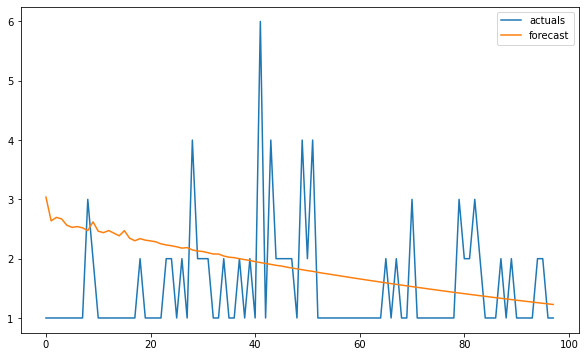

In [39]:
fresult[['actuals','forecast']].plot(figsize = (10,6))

In [83]:
def MAE(forecast_data,actual_col,predict_col):
    
    abs_diff = abs(forecast_data[actual_col] - forecast_data[predict_col])
    MAE = abs_diff.mean()
    return MAE
    
MAE(fresult,'actuals','forecast')

1.3620246841220442

In [40]:
def MAPE(forecast_data,actual_col,predict_col):
    
    relative_diff = abs((forecast_data[actual_col] - forecast_data[predict_col])/forecast_data[actual_col])
    MAPE = relative_diff.mean()
    return MAPE
    

In [41]:
MAPE(fresult,'actuals','forecast')

0.6726621881080741